In [1]:
using CairoMakie

In [2]:
set_theme!(theme_dark())

In [3]:
include("egm_code.jl")

egm_find_policies (generic function with 1 method)

In [4]:
model = create_EGM_model_aiyagari(;na = 101, nz = 19)

(n = 1919, na = 101, nz = 19, α = 0.33, β = 0.96, A = 0.08, γ = 2.0, δ = 0.1, θ = 2, lb = 0, ub = 200.0, ρ = 0.9, μ = 0.0, σ = 0.003, agrid = [0.0, 0.02, 0.08, 0.18, 0.32, 0.5000000000000001, 0.72, 0.9800000000000001, 1.28, 1.6199999999999999  …  165.62, 169.28, 172.98000000000002, 176.72, 180.5, 184.32, 188.17999999999998, 192.07999999999998, 196.01999999999998, 200.0], zgrid = -3.815376618407356:0.42426406871192845:3.8213766184073563, Π = [3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; … ; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6], w = 1.0, r_lb = 0.0, r_ub = 0.1, r_iter = 0.05, toler_pol = 1.0e-6, toler_price = 0.001, maxiter_pol = 500, maxiter_prices = 100, print_skip_pol = 5, print_skip_val = 50)

In [5]:
s, c = egm_find_policies(model)

/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 0.30708945225503514
--------------------
Iteration: 5, Error: 0.23548627406809367
--------------------
Iteration: 10, Error: 0.19848527362551394
--------------------
Iteration: 15, Error: 0.33071068553519617
--------------------
Iteration: 20, Error: 0.2543077543000376
--------------------
Iteration: 25, Error: 0.34123586621272467
--------------------
Iteration: 30, Error: 0.25442322363499437
--------------------
Iteration: 35, Error: 0.34124450843989523
--------------------
Iteration: 40, Error: 0.25442381009003895
--------------------
Iteration: 45, Error: 0.34124455352431343
--------------------
Iteration: 50, Error: 0.25442381315369583
--------------------
Iteration: 55, Error: 0.3412445537598748
--------------------
Iteration: 60, Error: 0.2544238131697033
--------------------
Iteration: 65, Error: 0.3412445537611055
--------------------
Iteration: 70, Error: 0.25442381316978696
--------------------
Iter

([0.0 0.0 … 17.919569957339256 27.548477134012455; 0.0 0.0 … 17.932371079384257 27.561287299862606; … ; 125.30024088129419 125.30734642762758 … 143.52269363668006 153.15978852671972; 127.85088869973829 127.85799424607168 … 146.0733642351506 155.71046773278556], [0.022029416207459813 0.03367119517536108 … 11.958135030995088 18.118554011070618; 0.043029416207459814 0.05467119517536108 … 11.966333908950087 18.126743845220467; … ; 80.54278853491327 80.54732476754779 … 92.17601135165427 98.32824261836336; 82.17114071646917 82.17567694910369 … 93.80434075318377 99.9565634122975])

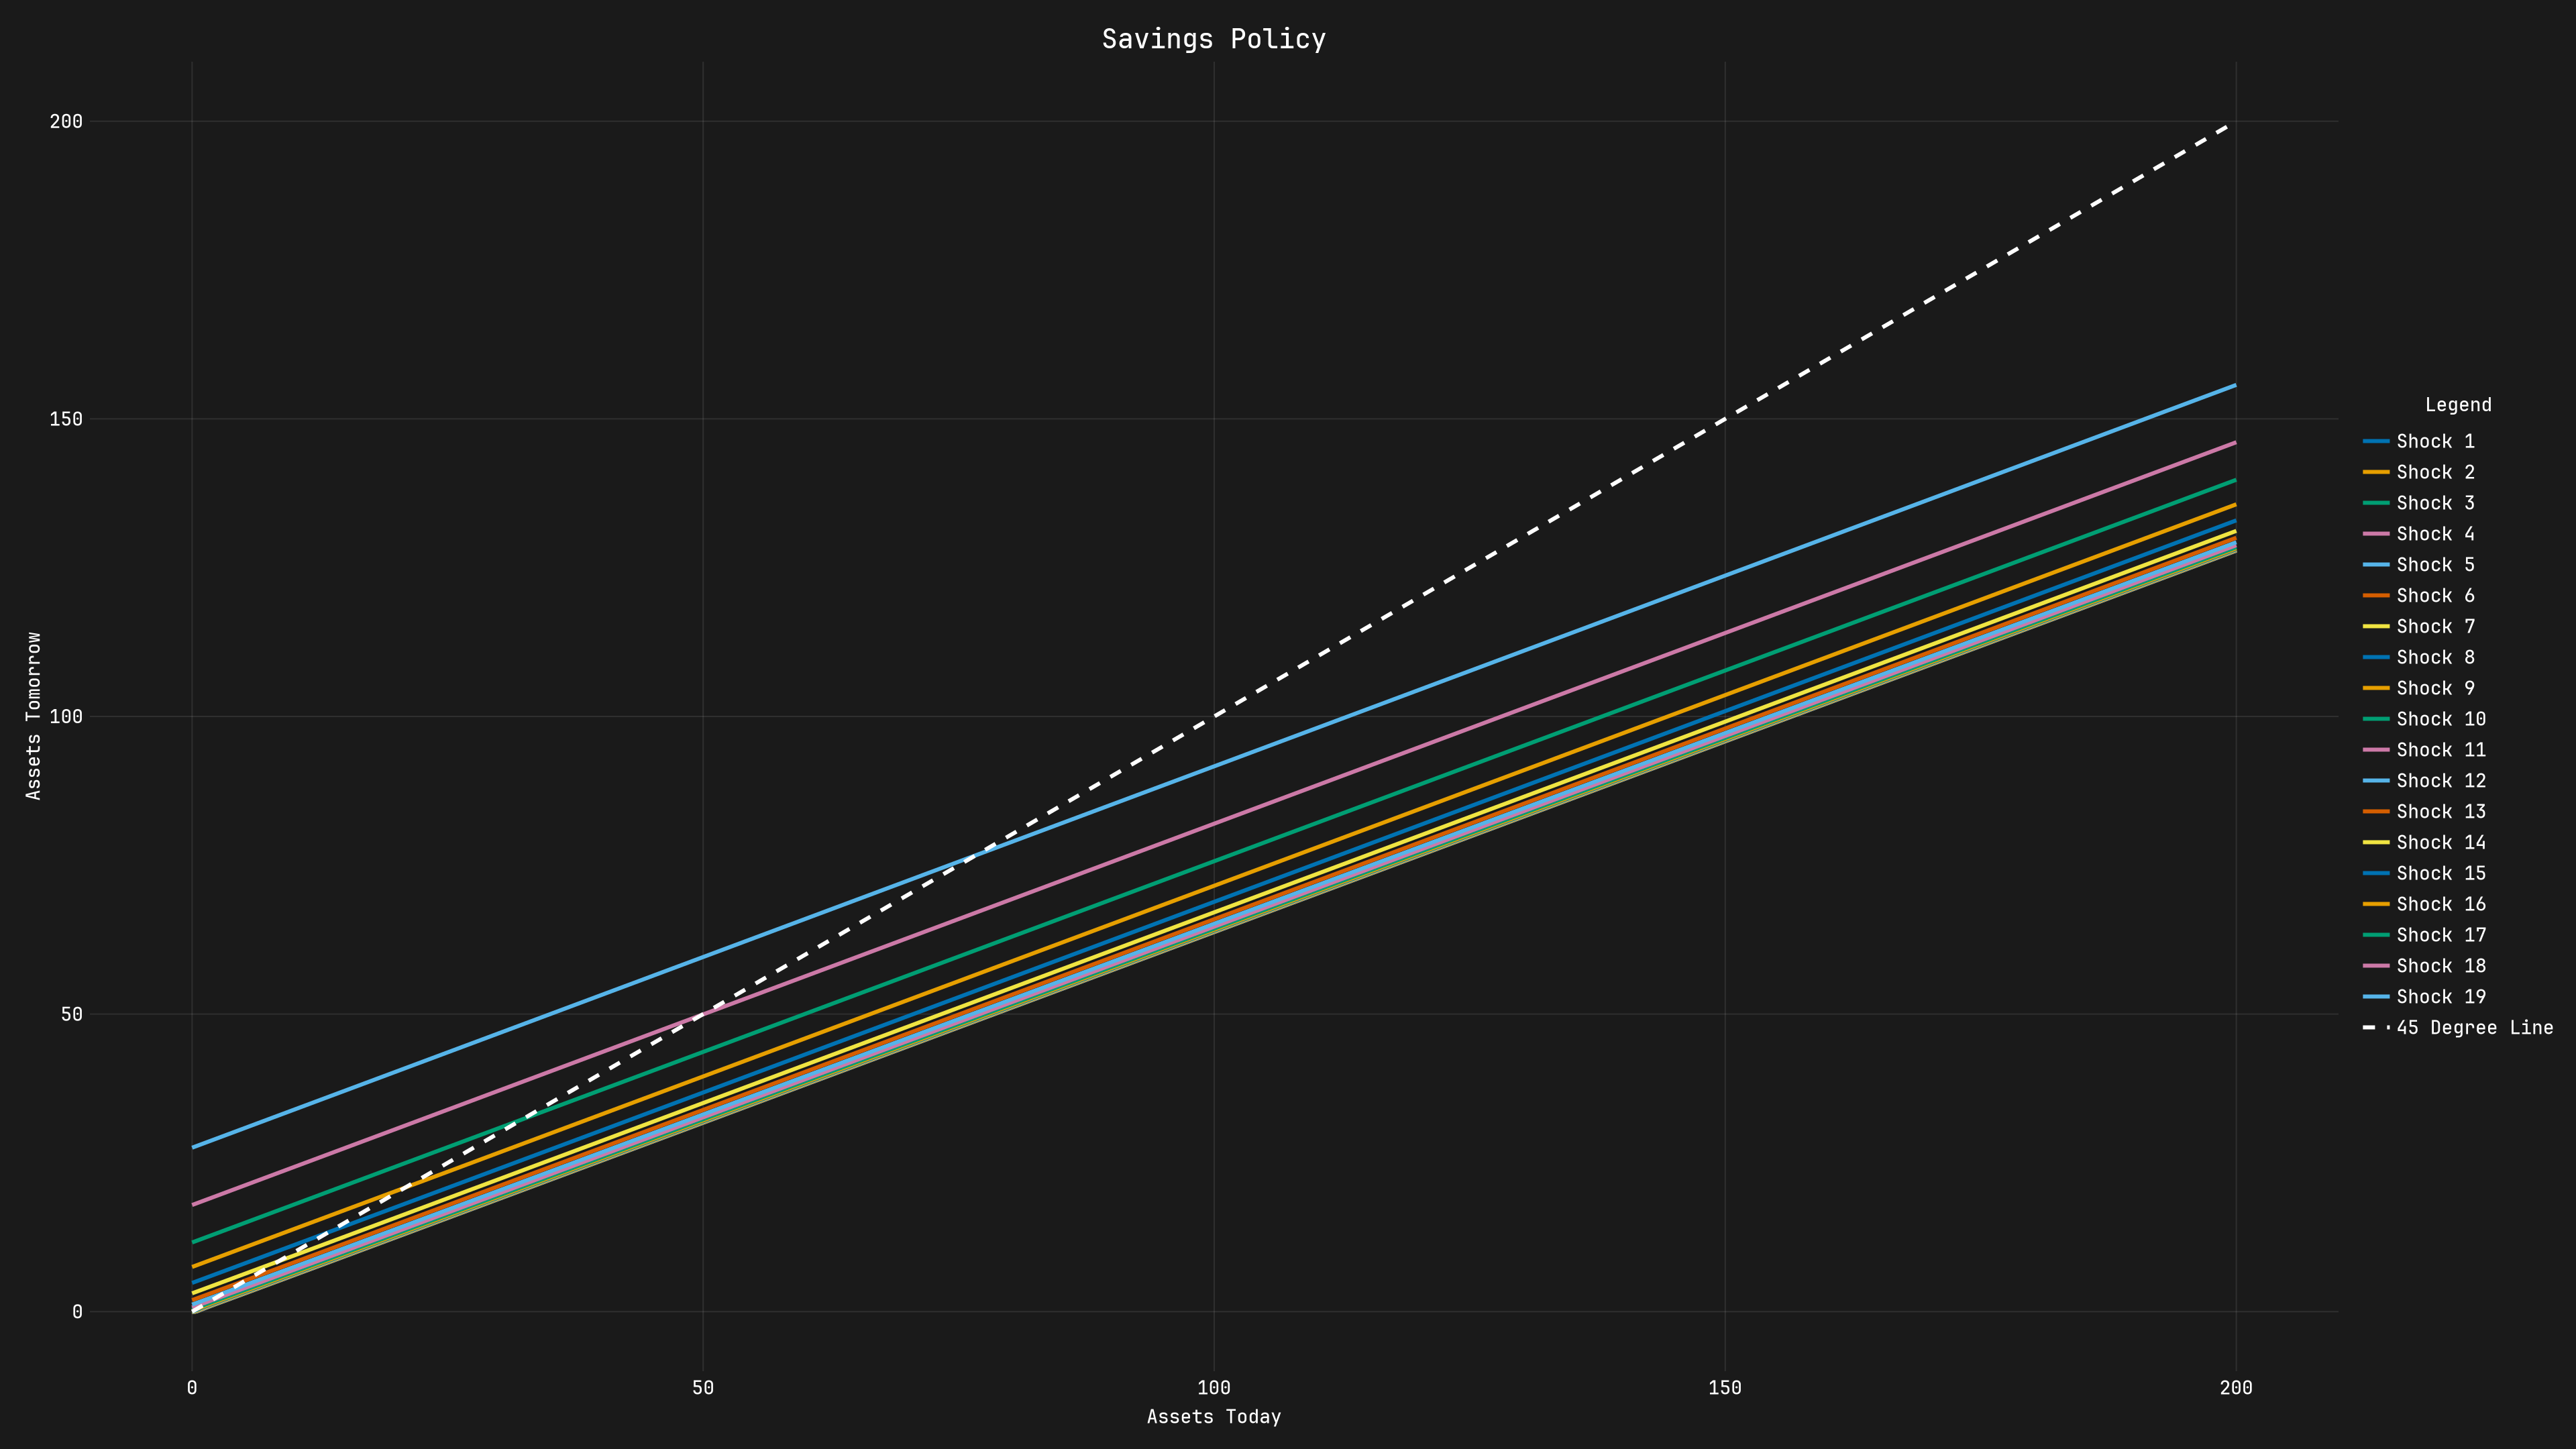

In [7]:
fig = Figure(size = (1920, 1080))

ax = Axis(fig[1, 1], 
        title = "Savings Policy",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        titlesize = 20,
        xlabel = "Assets Today",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabel = "Assets Tomorrow", 
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")

for z in 1:model.nz
    lines!(ax, model.agrid, s[:, z], linewidth = 3, label = "Shock $z")
end

lines!(ax, model.agrid, model.agrid, color = :white, linestyle = :dash, linewidth = 3, label = "45 Degree Line")

legend = Legend(fig[1, 2], 
                ax, 
                "Legend",  
                orientation = :vertical, 
                fontsize = 4, 
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)

fig

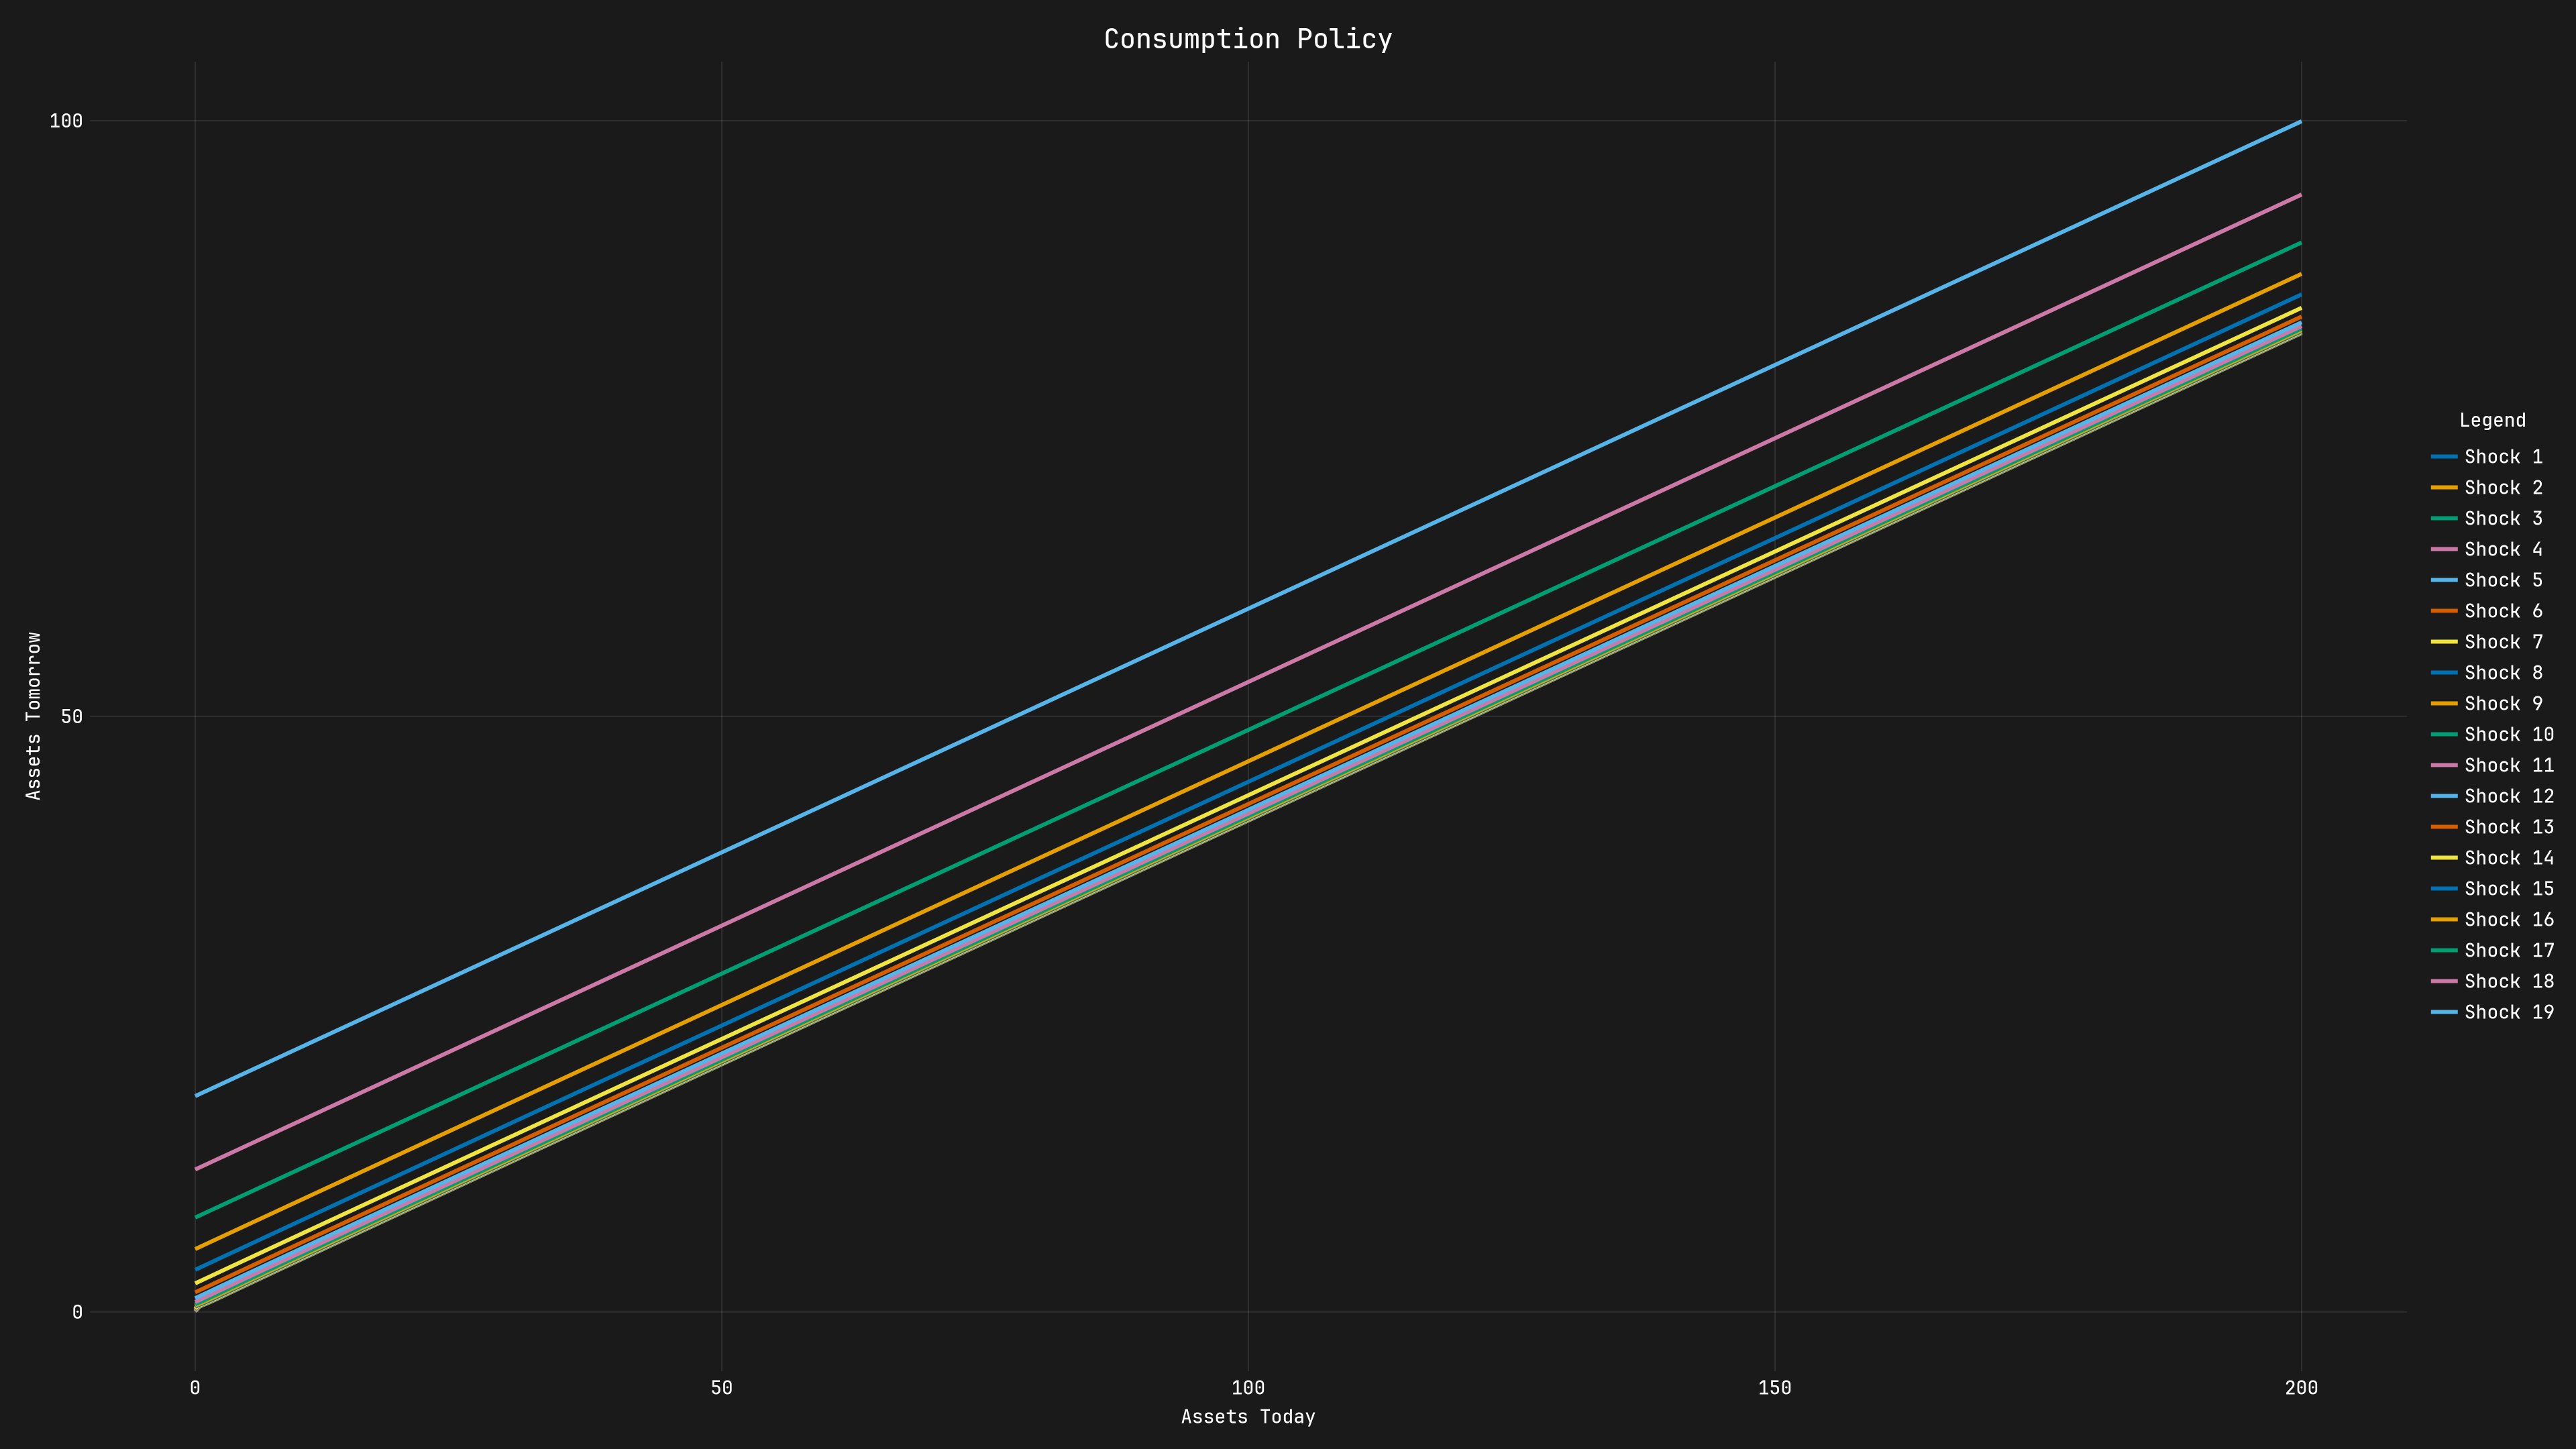

In [8]:
fig = Figure(size = (1920, 1080))

ax = Axis(fig[1, 1], 
        title = "Consumption Policy",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        titlesize = 20,
        xlabel = "Assets Today",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabel = "Assets Tomorrow", 
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")

for z in 1:model.nz
    lines!(ax, model.agrid, c[:, z], linewidth = 3, label = "Shock $z")
end

legend = Legend(fig[1, 2], 
                ax, 
                "Legend",  
                orientation = :vertical, 
                fontsize = 4, 
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)

fig